Dataset description : This dataset was derived from the original copy and simplified for learning purposes. It contains a set of machines, which run Microsoft Windows OS. The goal of this exercise is to predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine.

Dataset link: https://drive.google.com/file/d/13hQ-46e6Q7zvLgx8jmQ2R_HwcvKjhpCA/view?usp=sharing

In [1]:
import warnings

warnings.filterwarnings('ignore')

**SUPERVISED LEARNING**

Import necessaru libraries

In [3]:
import pandas as pd
from pandas_profiling import ProfileReport  
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

print(f' Libraries successfully imported')

 Libraries successfully imported


Import/Load Dataset

In [5]:
dataset = pd.read_csv('Microsoft_malware_dataset_min.csv', nrows = 5000)

dataset

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18
...,...,...,...,...,...,...,...,...,...,...
4995,1,1.0,0.0,Professional,1,1.0,0.0,1.0,rs4,44
4996,1,1.0,0.0,Core,0,1.0,0.0,1.0,rs3,91
4997,1,1.0,0.0,Core,0,1.0,0.0,1.0,rs4,150
4998,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,207


In [7]:
#Perform exploratory data analysis

# Display first five(5) rows

dataset.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18


In [9]:
#Dispay dataset info

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HasDetections               5000 non-null   int64  
 1   Wdft_IsGamer                4870 non-null   float64
 2   Census_IsVirtualDevice      4989 non-null   float64
 3   Census_OSEdition            5000 non-null   object 
 4   Census_HasOpticalDiskDrive  5000 non-null   int64  
 5   Firewall                    4952 non-null   float64
 6   SMode                       4703 non-null   float64
 7   IsProtected                 4984 non-null   float64
 8   OsPlatformSubRelease        5000 non-null   object 
 9   CountryIdentifier           5000 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 390.8+ KB


In [11]:
#Statistical analysis on dataset

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
HasDetections,5000.0,0.507200,0.499998,0.0,0.0,1.0,1.0,1.0
Wdft_IsGamer,4870.0,0.281930,0.449986,0.0,0.0,0.0,1.0,1.0
Census_IsVirtualDevice,4989.0,0.008619,0.092447,0.0,0.0,0.0,0.0,1.0
Census_HasOpticalDiskDrive,5000.0,0.073800,0.261471,0.0,0.0,0.0,0.0,1.0
Firewall,4952.0,0.978796,0.144077,0.0,1.0,1.0,1.0,1.0
SMode,4703.0,0.000425,0.020620,0.0,0.0,0.0,0.0,1.0
IsProtected,4984.0,0.950040,0.217884,0.0,1.0,1.0,1.0,1.0
CountryIdentifier,5000.0,109.775800,63.542873,2.0,51.0,97.0,164.0,222.0


In [13]:
#Check for missing values

dataset.isnull().sum()

HasDetections                   0
Wdft_IsGamer                  130
Census_IsVirtualDevice         11
Census_OSEdition                0
Census_HasOpticalDiskDrive      0
Firewall                       48
SMode                         297
IsProtected                    16
OsPlatformSubRelease            0
CountryIdentifier               0
dtype: int64

The above reveals that the dataset has some missings rows

Pandas profiling Report

In [15]:
profile = ProfileReport(dataset)
profile.to_file("Microsoft_Malware_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Handle Missing data/Remove duplicates/Delete Outliers

In [17]:
# Fill numeric columns with median and categorical columns with mode
for col in dataset.select_dtypes(include=["float", "int"]).columns:
    dataset[col].fillna(dataset[col].median(), inplace=True)

for col in dataset.select_dtypes(include=["object"]).columns:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

In [19]:
# Check for duplicates 

duplicates = dataset[dataset.duplicated()]

# Display duplicates, if any
if not duplicates.empty:
    print(f"Number of duplicate rows: {duplicates.shape[0]}")
    print(duplicates)
else:
    print("No duplicates found.")

Number of duplicate rows: 2256
      HasDetections  Wdft_IsGamer  Census_IsVirtualDevice  \
105               0           0.0                     0.0   
122               0           0.0                     0.0   
145               0           0.0                     0.0   
147               0           0.0                     0.0   
152               0           0.0                     0.0   
...             ...           ...                     ...   
4988              1           0.0                     0.0   
4990              1           0.0                     0.0   
4992              0           0.0                     0.0   
4994              0           0.0                     0.0   
4998              0           0.0                     0.0   

         Census_OSEdition  Census_HasOpticalDiskDrive  Firewall  SMode  \
105   CoreCountrySpecific                           0       1.0    0.0   
122    CoreSingleLanguage                           0       1.0    0.0   
145          P

From the above, some duplicate data exits in the dataset

In [21]:
# Remove Duplicates
dataset.drop_duplicates(inplace=True)

In [23]:
duplicates = dataset[dataset.duplicated()]

# Display duplicates, if any
if not duplicates.empty:
    print(f"Number of duplicate rows: {duplicates.shape[0]}")
    print(duplicates)
else:
    print("No duplicates found.")

No duplicates found.


In [25]:
# Handle Outliers (Example using IQR)
for col in dataset.select_dtypes(include=["float", "int"]).columns:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    dataset = dataset[(dataset[col] >= (Q1 - 1.5 * IQR)) & (dataset[col] <= (Q3 + 1.5 * IQR))]

**FEATURE ENGINEERING**

In [27]:
# Encode Categorical Features
dataset = pd.get_dummies(dataset, drop_first=True)
dataset

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier,Census_OSEdition_Core,Census_OSEdition_CoreCountrySpecific,...,Census_OSEdition_ProfessionalN,Census_OSEdition_ServerStandard,OsPlatformSubRelease_rs1,OsPlatformSubRelease_rs2,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs4,OsPlatformSubRelease_th1,OsPlatformSubRelease_th2,OsPlatformSubRelease_windows7,OsPlatformSubRelease_windows8.1
0,0,0.0,0.0,0,1.0,0.0,1.0,29,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0,0.0,0.0,0,1.0,0.0,1.0,93,False,False,...,False,False,False,False,False,True,False,False,False,False
2,0,0.0,0.0,0,1.0,0.0,1.0,86,True,False,...,False,False,False,False,False,True,False,False,False,False
3,1,0.0,0.0,0,1.0,0.0,1.0,88,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1,0.0,0.0,0,1.0,0.0,1.0,18,True,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,0,0.0,0.0,0,1.0,0.0,1.0,29,False,False,...,False,False,False,False,False,False,False,True,False,False
4991,0,0.0,0.0,0,1.0,0.0,1.0,119,True,False,...,False,False,True,False,False,False,False,False,False,False
4993,1,1.0,0.0,0,1.0,0.0,1.0,171,False,False,...,False,False,False,False,False,False,False,True,False,False
4996,1,1.0,0.0,0,1.0,0.0,1.0,91,True,False,...,False,False,False,False,True,False,False,False,False,False


In [37]:
# Prepare data for modeling
X = dataset[['Census_IsVirtualDevice', 'Census_HasOpticalDiskDrive', 'Firewall', 'IsProtected']]
y = dataset["HasDetections"]

In [39]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

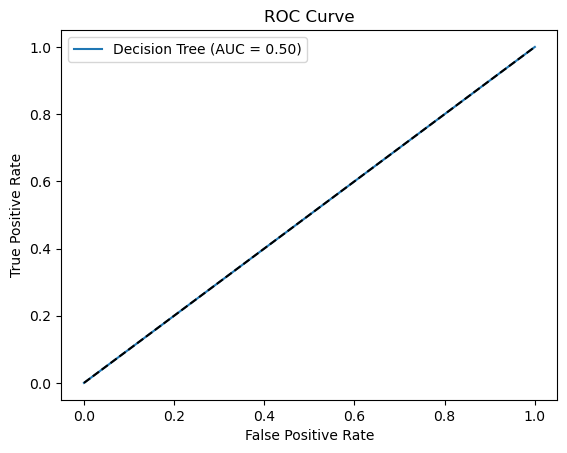

In [43]:
# Model Evaluation and ROC Curve
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

In [45]:
# Hyperparameter Tuning 
dt_model_tuned = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
dt_model_tuned.fit(X_train, y_train)
y_pred_proba_tuned = dt_model_tuned.predict_proba(X_test)[:, 1]
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
print(f"Tuned Model AUC: {roc_auc_tuned:.2f}")

Tuned Model AUC: 0.50


**UNSUPERVISED LEARNING**

In [47]:
# Drop the target column
dataset_clustering = dataset.drop("HasDetections", axis=1)  

In [49]:
# Apply K-Means Clustering

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

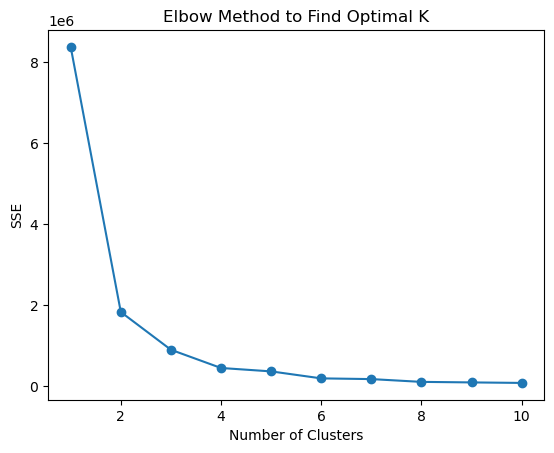

In [51]:
# Determine optimal K using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset_clustering)
    sse.append(kmeans.inertia_)

%matplotlib inline
plt.figure()
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method to Find Optimal K")
plt.show()

In [53]:
# Using elbow method, k = 2

optimal_k = 2  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
dataset_clustering["Cluster"] = kmeans.fit_predict(dataset_clustering)

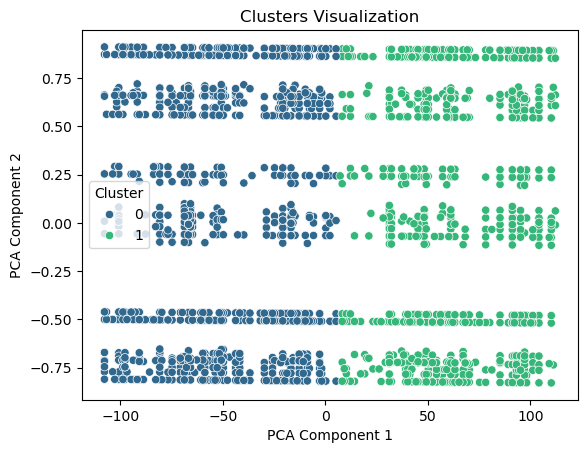

In [55]:
# PCA for Visualization (optional, if dataset is high-dimensional)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dataset_clustering.drop("Cluster", axis=1))

%matplotlib inline
plt.figure()
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=dataset_clustering["Cluster"], palette="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters Visualization")
plt.show()

In [57]:
#Calculating Silhouette Score to evaluate the model

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Scale the data (important for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset)  

# Fit K-means model
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)  
labels = kmeans.fit_predict(data_scaled)

# Calculate Silhouette Score
sil_score = silhouette_score(data_scaled, labels)
print(f'Silhouette Score for K-means clustering with k={2}: {sil_score}')


Silhouette Score for K-means clustering with k=2: 0.6043246191363587
